In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [3]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(x_train, y_train), (test_data, y_test) = reuters.load_data(num_words=10000)

# 2) 훈련 데이터에서 25%를 검증 데이터로 분리
train_data, val_data, train_labels, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [4]:
train_data

array([list([1, 53, 151, 26, 14, 68, 927, 39, 4074, 4220, 14, 318, 3859, 88, 19, 4927, 2588, 14, 7257, 5878, 155, 230, 53, 360, 26, 14, 142, 26, 39, 4815, 2115, 14, 2442, 7246, 88, 12, 6594, 5007, 14, 19, 5460, 1501, 17, 12]),
       list([1, 486, 341, 147, 26, 14, 119, 26, 255, 219, 93, 360, 8955, 94, 318, 17, 12]),
       list([1, 2949, 1041, 10, 341, 142, 26, 14, 142, 26, 255, 2949, 1041, 894, 341, 188, 26, 14, 188, 26, 255, 219, 91, 440, 146, 93, 124, 123, 49, 1014, 796, 13, 25, 303, 3852, 163, 6, 252, 296, 22, 252, 102, 208, 6, 10, 2, 3523, 17, 12]),
       ...,
       list([1, 603, 295, 277, 171, 33, 805, 240, 125, 591, 101, 189, 28, 10, 146, 456, 44, 44, 20, 27, 70, 32, 58, 70, 12, 1257, 475, 7, 807, 6, 997, 4169, 76, 1654, 21, 125, 142, 29, 1265, 295, 277, 790, 8, 4, 295, 277, 591, 101, 23, 2, 306, 70, 72, 1257, 475, 488, 4, 2403, 21, 142, 29, 60, 1265, 582, 27, 4, 295, 277, 171, 1464, 139, 4, 738, 60, 1265, 28, 47, 59, 20, 57, 1086, 470, 153, 904, 287, 21, 4, 2783, 5, 226, 219

In [13]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dimension=10000):
  # reslut를 (샘플수, 10000) 크기의 배열로 초기화
    results = np.zeros((len(data), dimension))
    # 단어 인덱스 리스트가 모여있는 리스트 data를 하나씩 꺼내서
    for i, sequence in enumerate(data):
        results[i, sequence] = 1.0  # 인덱스 위치에 1 채우기
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
from tensorflow.keras.utils import to_categorical

# 예: train_labels, y_val, y_test를 원-핫 인코딩
train_labels_cat = to_categorical(train_labels)
val_labels_cat = to_categorical(y_val)
test_labels_cat = to_categorical(y_test)

# 모델 구성 및 컴파일
---
- BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 46개의 뉴스 주제를 분류하는 딥러닝 모델을 구성합니다.

In [8]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Input(shape=(10000, )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │     5,120,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 46)             │        23,598 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,146,158 (19.63 MB)

 Trainable params: 5,145,134 (19.63 MB)

 Non-trainable params: 1,024 (4.00 KB)

# 모델 학습
---
- ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.


| 변수명         | 용도                                         | 샘플 수(예시)           |
| -------------- | -------------------------------------------- | ----------------------- |
| train_data     | 모델 학습용 훈련 데이터                      | 전체 훈련의 75%         |
| train_labels   | train_data에 대응하는 레이블                  | train_data와 개수 일치   |
| val_data       | 모델 검증용 데이터 (하이퍼파라미터 튜닝, 과적합 방지) | 전체 훈련의 25%         |
| y_val          | val_data에 대응하는 레이블                    | val_data와 개수 일치     |
| test_data      | 모델 평가용 최종 테스트 데이터                | 별도로 분리된 테스트셋  |
| y_test         | test_data에 대응하는 레이블                   | test_data와 개수 일치    |

In [18]:
check_point_cb = callbacks.ModelCheckpoint('reuters_model.h5',
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(
    x_train, train_labels_cat,
    epochs=200,
    validation_data=(x_val, val_labels_cat),
    callbacks=[check_point_cb, early_stopping_cb]
)

Epoch 1/200
206/211 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9361 - loss: 0.3155

211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9356 - loss: 0.3180 - val_accuracy: 0.7961 - val_loss: 1.2364
Epoch 2/200
206/211 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9357 - loss: 0.3042

211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9356 - loss: 0.3046 - val_accuracy: 0.8148 - val_loss: 1.1593
Epoch 3/200
206/211 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9502 - loss: 0.2237

211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9502 - loss: 0.2238 - val_accuracy: 0.8215 - val_loss: 1.0535
Epoch 4/200
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9613 - loss: 0.1460 - val_accuracy: 0.8215 - val_loss: 1.0630
Epoch 5/200
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9653 - loss: 0.1650 - val_accuracy: 0.8166 - val_loss: 1.0866
Epoch 6/200
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9645 - loss: 0.1537 - val_accuracy: 0.8161 - val_loss: 1.1009
Epoch 7/200
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9627 - loss: 0.1561 - val_accuracy: 0.8148 - val_loss: 1.0990
Epoch 8/200
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9697 - loss: 0.1344 - val_accuracy: 0.8201 - val_loss: 1.0886
Epoch 9/200
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9670 - loss: 0.1413 - val_accuracy: 0.8170 - val_loss: 1.1104
Epoch 10/200
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9704 - loss: 0.1257 - val_accuracy: 0.813

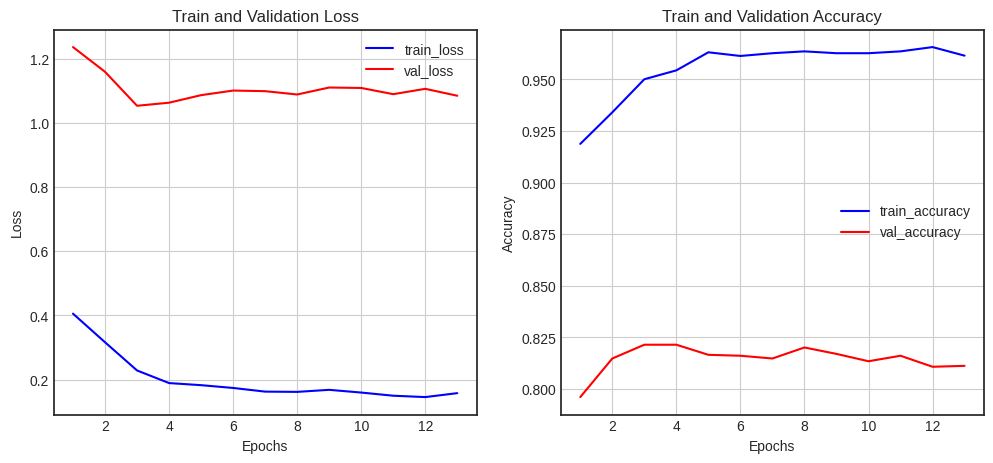

In [19]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-v0_8-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [20]:
test_loss, test_accuracy = model.evaluate(x_test, test_labels_cat)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7955 - loss: 1.1880
Test Loss: 1.2005
Test Accuracy: 0.7947
